In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py
import EWdata


### Spectrum data from cluster

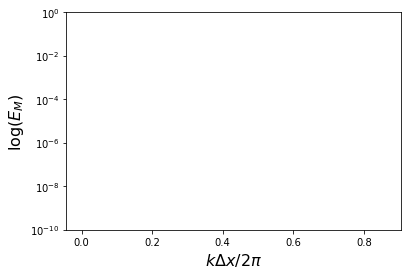

In [10]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'
arr = np.load(os.path.join(root_path, 'non_random_bubbles', 'spec_data', 'nr_1_bfield_16.npy'))
plt.plot(arr[0], arr[1])
plt.xlabel('$k\Delta x/2\pi$', fontsize = 16)
plt.ylabel('log($E_M$)', fontsize = 16)
plt.yscale('log')
plt.ylim([10**-10, 1])
plt.show()

### Spectrum of one file

In [3]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'
c1 = EWdata.constants(eta = 1.0, dx = 0.25, nSize = 256)
BINS = 120


In [11]:
file_path = os.path.join(root_path, 'rand_nucl_256', 'raw', 'rnu_1123_bfield.h5')
h5file = EWdata.H5Reader(file_path)
dset = h5file.dataset_
dshape = h5file.shape_

fourier = EWdata.FourierTransform(dset)
fourier.fft()
fourier.energy_spectrum()
seps, vals = fourier.configure_magnitude_bins(BINS)
DK = seps[1] - seps[0]
s = fourier.radial_spectrum(BINS)
# norm_factor = 1/(2.0*(c1.nSize()/c1.dx())**3) * 1/(c1.LatV()*c1.mH()**4)
# proper normalization: such that radial.sum() == total energy
s = s /(2.0*(c1.nSize()/c1.dx())**3)
# normalize to energy density in units of m_H^4
s = s / (c1.LatV()*c1.mH()**4)
## normalize to area
s = s / DK

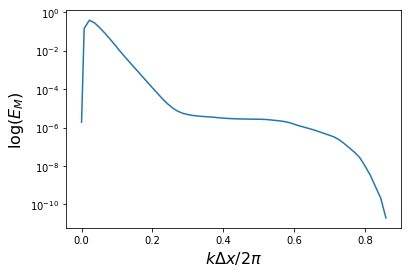

In [17]:
plt.plot(vals, s)
plt.xlabel('$k\Delta x/2\pi$', fontsize = 16)
plt.ylabel('log($E_M$)', fontsize = 16)
plt.xscale('linear')
plt.yscale('log')
plt.show()

### Spectra of a series of configurations -- vary $p_B$

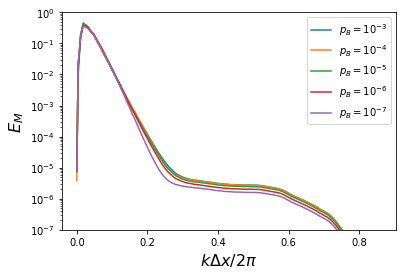

In [8]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'
c1 = EWdata.constants(eta = 1.0, dx = 0.25, nSize = 256)
BINS = 120

ids = ['1122', '1123', '1124', '1125','1126']
log10_pb = [-3, -4, -5, -6, -7]
mode = []

for idx, i in enumerate(ids):
    file_path = os.path.join(root_path, 'rand_nucl_256', 'raw', 'rnu_'+i+'_bfield.h5')
    h5file = EWdata.H5Reader(file_path)
    dset = h5file.dataset_
    dshape = h5file.shape_

    fourier = EWdata.FourierTransform(dset)
    fourier.fft()
    fourier.energy_spectrum()
    seps, vals = fourier.configure_magnitude_bins(BINS)
    DK = seps[1] - seps[0]
    s = fourier.radial_spectrum(BINS)
    # norm_factor = 1/(2.0*(c1.nSize()/c1.dx())**3) * 1/(c1.LatV()*c1.mH()**4)
    # proper normalization: such that radial.sum() == total energy
    s = s /(2.0*(c1.nSize()/c1.dx())**3)
    # normalize to energy density in units of m_H^4
    s = s / (c1.LatV()*c1.mH()**4)
    ## normalize to area
    s = s / DK
    plt.plot(vals, s, label = '$p_B=10^{'+str(log10_pb[idx])+'}$')
    mode.append(s.argmax())

plt.xlabel('$k\Delta x/2\pi$', fontsize = 16)
plt.ylabel('$E_M$', fontsize = 16)
plt.xscale('linear')
plt.yscale('log')
plt.ylim([10**-7, 1])
plt.legend(loc = 'upper right')
plt.show()

In [9]:
mode

[3, 3, 3, 3, 3]

### Spectra of a series of configurations -- vary $\gamma$

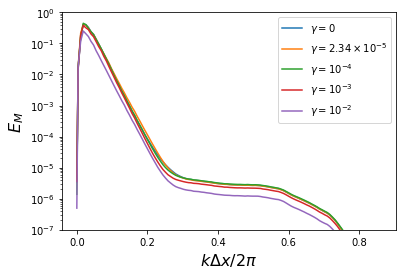

In [10]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'
c1 = EWdata.constants(eta = 1.0, dx = 0.25, nSize = 256)
BINS = 120

ids = ['1113', '1123', '1133', '1143','1153']
damping = ['0', '$2.34 \\times 10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$']
mode = []

for idx, i in enumerate(ids):
    file_path = os.path.join(root_path, 'rand_nucl_256', 'raw', 'rnu_'+i+'_bfield.h5')
    h5file = EWdata.H5Reader(file_path)
    dset = h5file.dataset_
    dshape = h5file.shape_

    fourier = EWdata.FourierTransform(dset)
    fourier.fft()
    fourier.energy_spectrum()
    seps, vals = fourier.configure_magnitude_bins(BINS)
    DK = seps[1] - seps[0]
    s = fourier.radial_spectrum(BINS)
    # norm_factor = 1/(2.0*(c1.nSize()/c1.dx())**3) * 1/(c1.LatV()*c1.mH()**4)
    # proper normalization: such that radial.sum() == total energy
    s = s /(2.0*(c1.nSize()/c1.dx())**3)
    # normalize to energy density in units of m_H^4
    s = s / (c1.LatV()*c1.mH()**4)
    ## normalize to area
    s = s / DK
    plt.plot(vals, s, label = '$\gamma=$'+damping[idx])
    mode.append(s.argmax())

plt.xlabel('$k\Delta x/2\pi$', fontsize = 16)
plt.ylabel('$E_M$', fontsize = 16)
plt.xscale('linear')
plt.yscale('log')
plt.ylim([10**-7, 1])
plt.legend(loc = 'upper right')
plt.show()

In [13]:
seps[mode]

array([ 0.0291101 ,  0.02183257,  0.02183257,  0.02183257,  0.02183257])